In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison 

In [3]:
monkeypox = pd.read_excel("monkeypox.xlsx")

In [4]:
monkeypox.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class
0,18,2022-07-08 10:12:00,Much of the focus on #monkeypox recently has b...,Twitter Web App,False,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:00,2,0,2,0,3696,2993,3459,25,"London, England",0,0
1,31,2022-07-09 00:00:00,ICYMI: The first probable case of monkeypox in...,TweetDeck,True,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:00,2,0,1,0,75836,1753,125528,531,"Charleston, WV",0,0
2,32,2022-07-09 00:00:00,WHO: #Monkeypox outbreak not yet a global publ...,eClincher,False,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:00,0,0,0,0,2852,2381,10615,14,"Utah, USA",0,0
3,33,2022-07-09 00:00:00,"According to the CDC, monkeypox is usually spr...",Sprout Social,True,True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:00,1,0,1,0,22897,5665,119258,663,Downtown Minneapolis,0,0
4,34,2022-07-09 00:00:00,LGBTQ advocates and health care organizations ...,SocialNewsDesk,True,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:00,0,0,0,0,81296,466,148219,747,"Rochester, NY",0,0


In [53]:
monkeypoxFTcount.head()

,followers count,retweet_count,user created at
0,3696,2,2011-08-14 19:22:00
1,75836,2,2009-04-17 15:21:00
2,2852,0,2019-03-05 19:24:00
3,22897,1,2009-02-18 14:57:00
4,81296,0,2008-10-27 02:14:00


In [54]:
monkeypoxFTcount['followers count'].value_counts()

4        72
6        57
0        56
5        49
9        46
         ..
44371     1
52363     1
79553     1
605       1
3944      1
Name: followers count, Length: 2433, dtype: int64

In [55]:
monkeypoxFTcount['followers count'].describe()

count    5.787000e+03
mean     3.678703e+04
std      5.183490e+05
min      0.000000e+00
25%      9.300000e+01
50%      5.390000e+02
75%      2.733500e+03
max      2.212650e+07
Name: followers count, dtype: float64

In [56]:
monkeypoxFTcount['retweet_count'].value_counts()

0      4575
1       550
2       176
3       104
4        73
       ... 
113       1
343       1
185       1
66        1
166       1
Name: retweet_count, Length: 79, dtype: int64

In [57]:
monkeypoxFTcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   followers count  5787 non-null   int64         
 1   retweet_count    5787 non-null   int64         
 2   user created at  5787 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 135.8 KB


In [58]:
monkeypoxFTcount['retweet_count'].describe()

count    5787.000000
mean        2.742872
std        39.652237
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2281.000000
Name: retweet_count, dtype: float64

In [60]:
monkeypoxFTcount['user created at'].describe()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7896\1394375522.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  monkeypoxFTcount['user created at'].describe()


count                    5787
unique                   4584
top       2013-08-13 06:16:00
freq                       44
first     2006-12-21 14:40:00
last      2022-07-09 18:46:00
Name: user created at, dtype: object

In [62]:
monkeypoxFTcount.mean()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7896\682648425.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  monkeypoxFTcount.mean()


followers count    36787.029722
retweet_count          2.742872
dtype: float64

In [63]:
monkeypoxFTcount['retweet_count'].var()

1572.2999297387003

In [64]:
monkeypoxFTcount['followers count'].var()

268685718056.67282

In [65]:
monkeypoxFTcount['retweet_count'].std()

39.652237386290075

In [66]:
monkeypoxFTcount['followers count'].std()

518349.0311138556

In [67]:
monkeypoxFTcount.shape

(5787, 3)

In [68]:
monkeypoxFTcount.head()

,followers count,retweet_count,user created at
0,3696,2,2011-08-14 19:22:00
1,75836,2,2009-04-17 15:21:00
2,2852,0,2019-03-05 19:24:00
3,22897,1,2009-02-18 14:57:00
4,81296,0,2008-10-27 02:14:00


<AxesSubplot:>

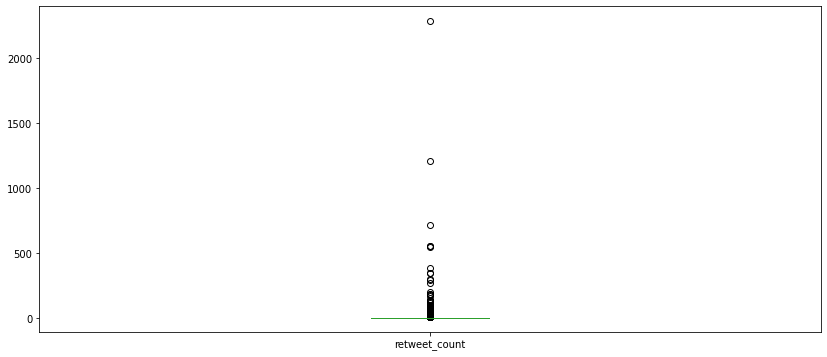

In [69]:
monkeypoxFTcount['retweet_count'].plot(kind='box', figsize=(14,6))

<AxesSubplot:ylabel='Density'>

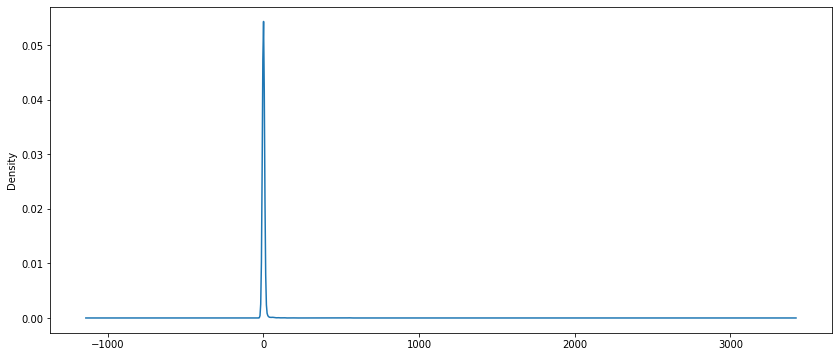

In [73]:
monkeypoxFTcount['retweet_count'].plot(kind='density', figsize=(14,6))

<AxesSubplot:>

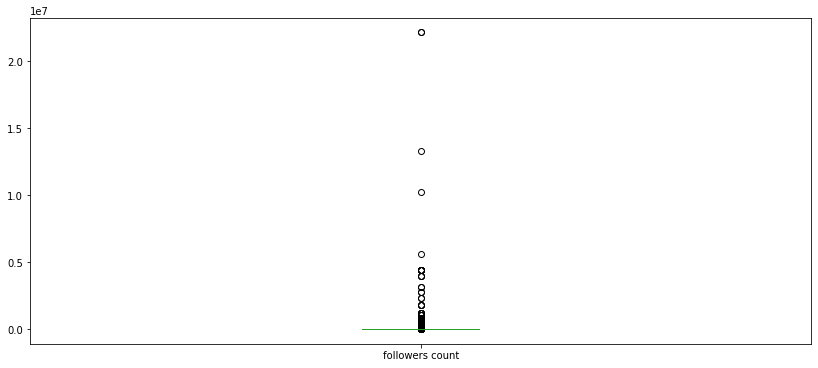

In [74]:
monkeypoxFTcount['followers count'].plot(kind='box', figsize=(14,6))

<AxesSubplot:ylabel='Density'>

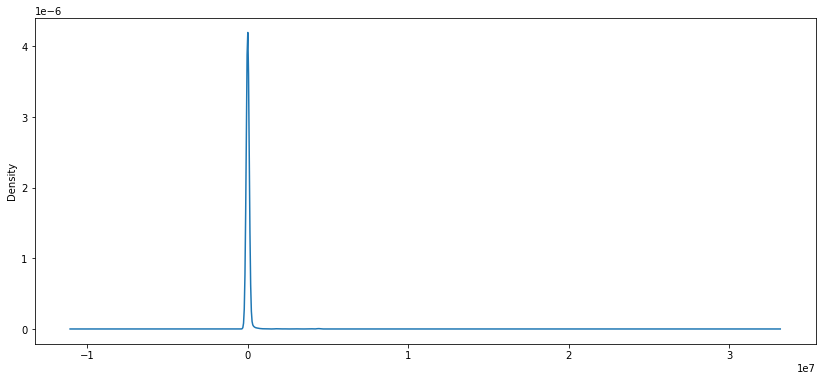

In [22]:
monkeypoxFTcount['followers count'].plot(kind='density', figsize=(14,6))

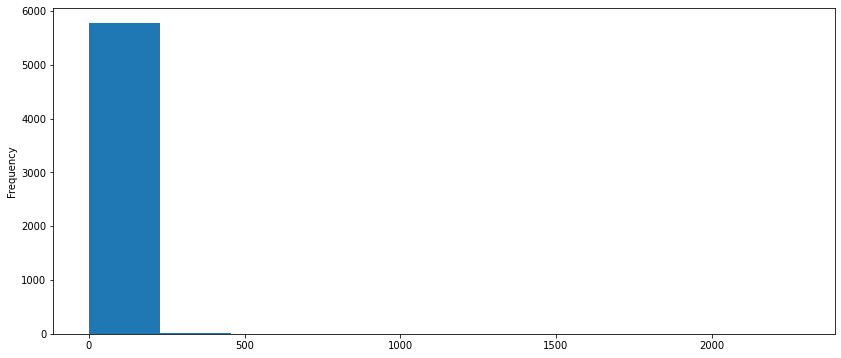

In [23]:
ax = monkeypoxFTcount['retweet_count'].plot(kind='hist',figsize=(14,6))

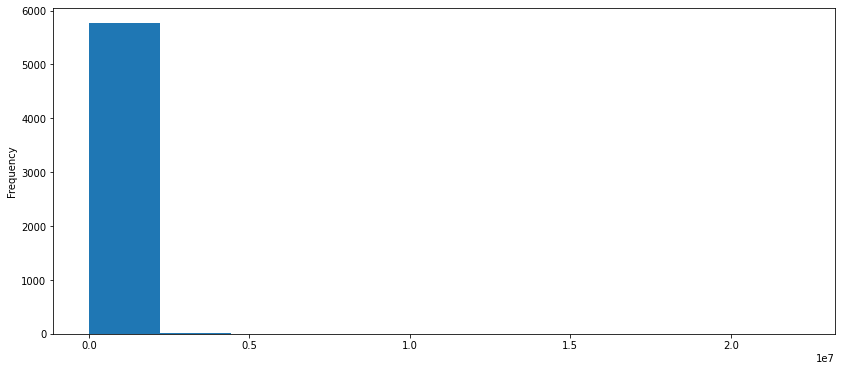

In [24]:
ax = monkeypoxFTcount['followers count'].plot(kind='hist',figsize=(14,6))

In [46]:
corr = monkeypoxFTcount.corr()
corr

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<AxesSubplot:xlabel='followers count', ylabel='retweet_count'>

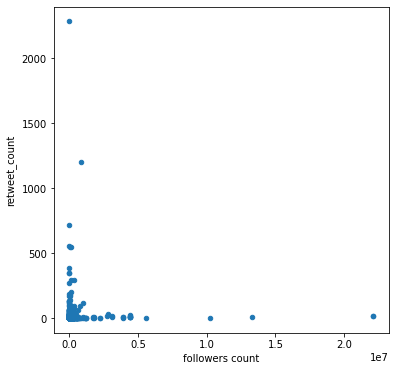

In [51]:
monkeypoxFTcount.plot(kind='scatter', x='followers count', y='retweet_count', figsize=(6,6))

In [29]:
monkeypoxFTcount = np.random.randint(0, 10, 50) ###creation of an array of 50 random integers between 0 and 10

In [30]:
monkeypoxFTcount = monkeypoxFTcount + np.random.normal(0, 10, 50)

### something missing in the code here. 

np.corrcoef(MPfollow_up, MPfollow_up1) 

<AxesSubplot:>

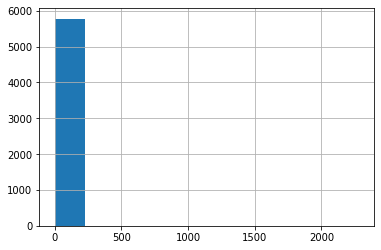

In [36]:
monkeypox['retweet_count'].hist()

<AxesSubplot:>

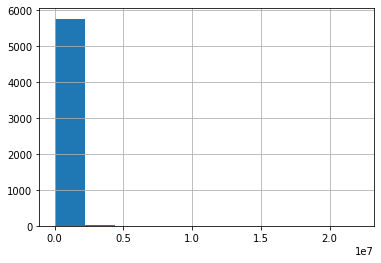

In [37]:
monkeypox['followers count'].hist()

<AxesSubplot:>

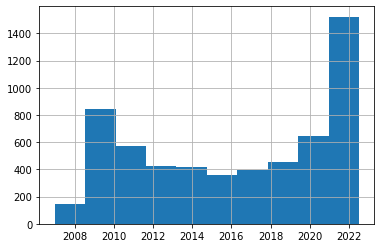

In [75]:
monkeypox['user created at'].hist()

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followers count', ylabel='Density'>

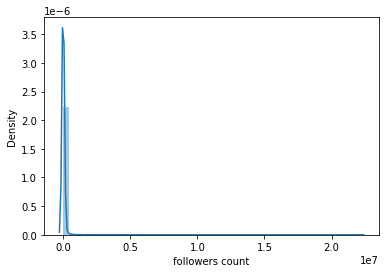

In [38]:
sns.distplot(monkeypox['followers count'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user created at', ylabel='Density'>

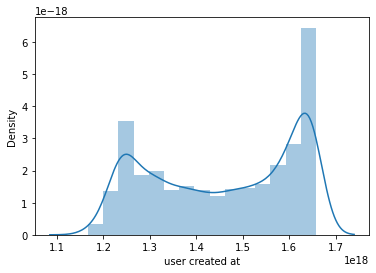

In [76]:
sns.distplot(monkeypox['user created at'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

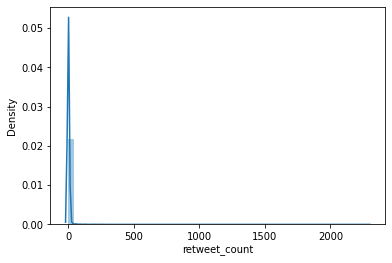

In [79]:
sns.distplot(monkeypox['retweet_count']) # seaborn distribution plot

In [80]:
# bar charts ## Barchart not running 
BarChart = monkeypox ['followers count'].value_counts().plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

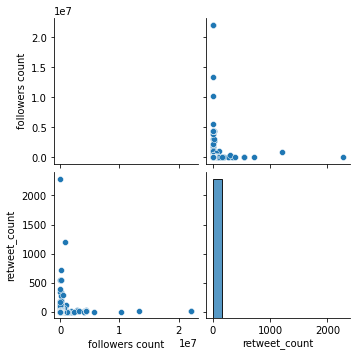

In [81]:
# multiple histograms 
sns.pairplot(monkeypoxFTcount)

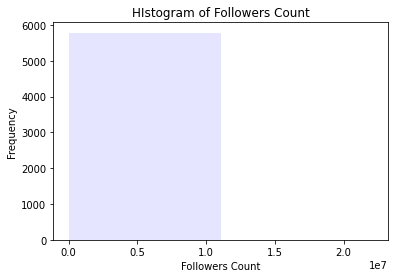

In [82]:
# HISTOGRAM PLOT
num_bins=2
n, bins, patches = plt.hist(monkeypox['followers count'], num_bins, facecolor='blue', alpha=.1) 
plt.xlabel('Followers Count')
plt.ylabel('Frequency')
plt.title('HIstogram of Followers Count')
plt.show()

In [1]:
Plot = monkeypox.plot.scatter(x='followers fount', y= 'retweet_count', c='retweet_count')
Plot.set_title("Monkeypox Misinformation by Followers Count and Retweet Count")
Plot.set_xlabel("followers count")
Plot.set_ylabel("retweet count")

NameError: name 'monkeypox' is not defined